In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Load from HDF5 file

project = os.path.realpath('./..')
baseline = os.path.join(project, 'baseline')
scaling = os.path.join(project, 'scalability')

In [3]:
os.listdir(baseline)

['minibatch_by50_batchsize10.csv',
 'baseline.py',
 'minibatch_by50_batchsize50.csv',
 '.idea',
 'minibatch_by50_batchsize5.csv',
 'minibatch_by50_batchsize100.csv',
 'timers.py',
 'minibatch_by50_batchsize20.csv',
 'dbscan_from0.1_to2.0_by0.1.csv',
 '__init__.py',
 'timers.pyc',
 'kmeans_by5.csv']

In [4]:
os.listdir(scaling)

['sample_counters.py',
 'minibatch_scale_by500_batchsize100.csv',
 'minibatch_scale_by500_batchsize5.csv',
 'minibatch_scale_by500_batchsize50.csv',
 'kmeans_scale_by500.csv',
 'dbscan_scale_by500.csv',
 'kmeans_scale_by100.csv',
 'sample_counters.pyc',
 'scalability.py',
 'minibatch_scale_by500_batchsize20.csv',
 'minibatch_scale_by500_batchsize10.csv',
 '__init__.py']

In [5]:
kmeans = pd.read_csv(os.path.join(baseline, 'kmeans_by5.csv'))
kmeans_scaling = pd.read_csv(os.path.join(scaling, 'kmeans_scale_by500.csv'))

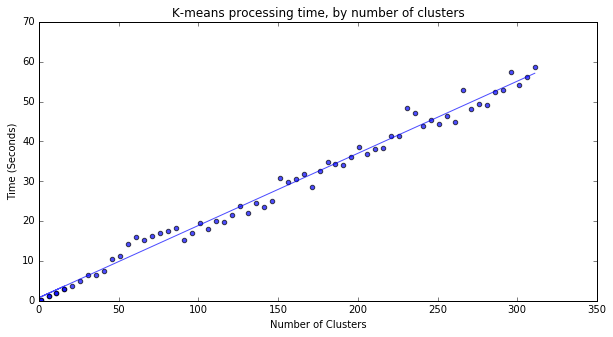

In [6]:
plt.figure(figsize=[10,5])

# Plot scatter points
plt.scatter(x=kmeans.clusters, y=kmeans.seconds, alpha=0.7)

# Add line of best fit
bestfit = np.poly1d(np.polyfit(kmeans.clusters, kmeans.seconds, 1))(kmeans.clusters)
plt.plot(kmeans.clusters, bestfit, color='blue', alpha=0.7)

# Labels and other parameters
plt.axis(xmin=0, ymin=0)
plt.xlabel('Number of Clusters')
plt.ylabel('Time (Seconds)')
plt.title('K-means processing time, by number of clusters')
plt.show()

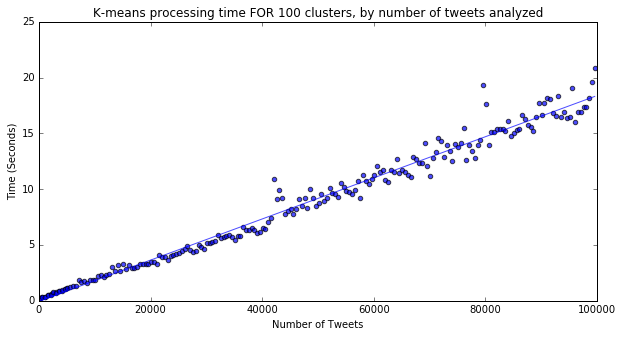

In [7]:
plt.figure(figsize=[10,5])

# Plot scatter points
plt.scatter(x=kmeans_scaling.samples, y=kmeans_scaling.seconds, alpha=0.7)

# # Add line of best fit
bestfit = np.poly1d(np.polyfit(kmeans_scaling.samples, kmeans_scaling.seconds, 1))(kmeans_scaling.samples)
plt.plot(kmeans_scaling.samples, bestfit, color='blue', alpha=0.7)

# Labels and other parameters
plt.axis(xmin=0, ymin=0, xmax=100000)
plt.xlabel('Number of Tweets')
plt.ylabel('Time (Seconds)')
plt.title('K-means processing time FOR 100 clusters, by number of tweets analyzed')
plt.show()

In [8]:
slope = np.polyfit(kmeans.clusters, kmeans.seconds, 1)[0]
print slope

0.18102372771


In [9]:
minibatch_files = ['minibatch_by50_batchsize5.csv', 
                   'minibatch_by50_batchsize10.csv', 
                   'minibatch_by50_batchsize20.csv',
                   'minibatch_by50_batchsize50.csv', 
                   'minibatch_by50_batchsize100.csv']
colors = ['#f6eff7', '#bdc9e1', '#67a9cf', '#1c9099', '#016c59']

mb_colors = dict(zip(minibatch_files, colors))
print mb_colors

{'minibatch_by50_batchsize100.csv': '#016c59', 'minibatch_by50_batchsize50.csv': '#1c9099', 'minibatch_by50_batchsize20.csv': '#67a9cf', 'minibatch_by50_batchsize5.csv': '#f6eff7', 'minibatch_by50_batchsize10.csv': '#bdc9e1'}


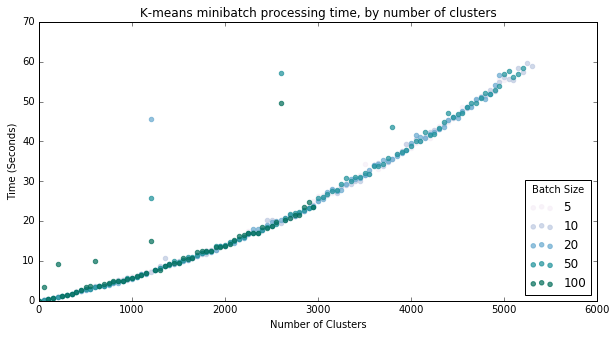

In [10]:
plt.figure(figsize=[10,5])

for data in minibatch_files:
    minibatch = pd.read_csv(os.path.join(baseline, data))
    label = data.replace('minibatch_by50_batchsize', '').replace('.csv','')
    plt.scatter(x=minibatch.clusters, y=minibatch.seconds, alpha=0.7, 
                color=mb_colors[data], label=label)

# Labels and other parameters
plt.axis(xmin=0, ymin=0)
plt.xlabel('Number of Clusters')
plt.ylabel('Time (Seconds)')
plt.title('K-means minibatch processing time, by number of clusters')
plt.legend(loc=4, title='Batch Size')
plt.show()

In [11]:
minibatch_files = ['minibatch_scale_by500_batchsize5.csv',
                   'minibatch_scale_by500_batchsize10.csv',
                   'minibatch_scale_by500_batchsize20.csv',
                   'minibatch_scale_by500_batchsize50.csv',
                   'minibatch_scale_by500_batchsize100.csv']
colors = ['#f6eff7', '#bdc9e1', '#67a9cf', '#1c9099', '#016c59']

mb_colors = dict(zip(minibatch_files, colors))
print mb_colors

{'minibatch_scale_by500_batchsize5.csv': '#f6eff7', 'minibatch_scale_by500_batchsize50.csv': '#1c9099', 'minibatch_scale_by500_batchsize100.csv': '#016c59', 'minibatch_scale_by500_batchsize20.csv': '#67a9cf', 'minibatch_scale_by500_batchsize10.csv': '#bdc9e1'}


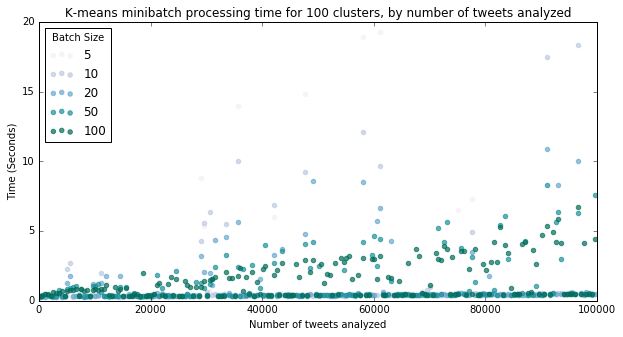

In [18]:
plt.figure(figsize=[10,5])

for data in minibatch_files:
    minibatch = pd.read_csv(os.path.join(scaling, data))
    label = data.replace('minibatch_scale_by500_batchsize', '').replace('.csv','')
    plt.scatter(x=minibatch.samples, y=minibatch.seconds, alpha=0.7, 
                color=mb_colors[data], label=label)

# Labels and other parameters
plt.axis(xmin=0, ymin=0, xmax=100000, ymax =20)
plt.xlabel('Number of tweets analyzed')
plt.ylabel('Time (Seconds)')
plt.title('K-means minibatch processing time for 100 clusters, by number of tweets analyzed')
plt.legend(loc=2, title='Batch Size')
plt.show()

In [13]:
dbscan = pd.read_csv(os.path.join(baseline, 'dbscan_from0.1_to2.0_by0.1.csv'))

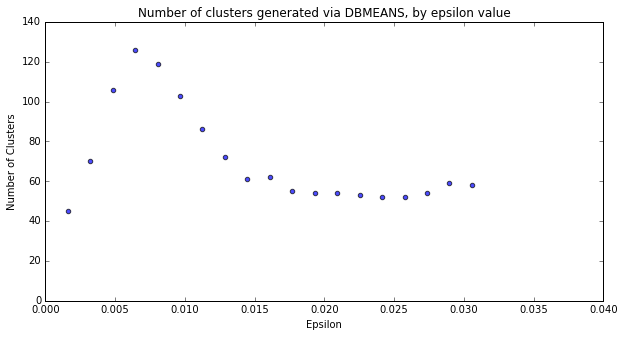

In [14]:
plt.figure(figsize=[10,5])

# Plot scatter points
plt.scatter(x=dbscan.espilon, y=dbscan.clusters, alpha=0.7)

# # Add line of best fit
# bestfit = np.poly1d(np.polyfit(kmeans.clusters, kmeans.seconds, 1))(kmeans.clusters)
# plt.plot(kmeans.clusters, bestfit, color='blue', alpha=0.7)

# Labels and other parameters
plt.axis(xmin=0, ymin=0)
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.title('Number of clusters generated via DBMEANS, by epsilon value')
plt.show()

In [23]:
dbscan_scale = pd.read_csv(os.path.join(scaling, 'dbscan_scale_by500.csv'))

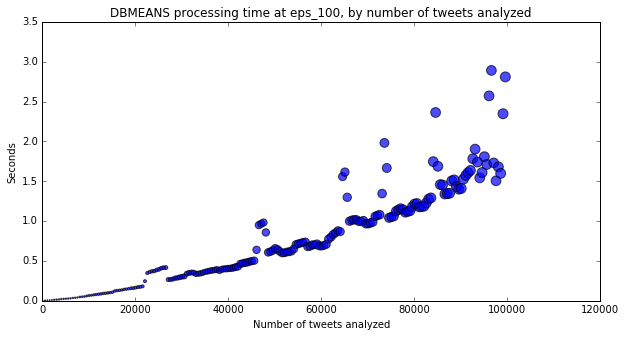

In [31]:
plt.figure(figsize=[10,5])

# Plot scatter points
plt.scatter(x=dbscan_scale.n, y=dbscan_scale.seconds, alpha=0.7, 
            s=dbscan_scale.clusters, label=dbscan_scale.clusters)

# # Add line of best fit
# bestfit = np.poly1d(np.polyfit(kmeans.clusters, kmeans.seconds, 1))(kmeans.clusters)
# plt.plot(kmeans.clusters, bestfit, color='blue', alpha=0.7)

# Labels and other parameters
plt.axis(xmin=0, ymin=0)
plt.xlabel('Number of tweets analyzed')
plt.ylabel('Seconds')
plt.title('DBMEANS processing time at eps_100, by number of tweets analyzed')
plt.show()